In [5]:

#===========================================================#
#         Welcome to the Orbiting TImescale for Sinking library
#============================================================
#         O  T  I  S
#         /\     /\     Created by Alice Damiano
#        /  \___/  \     contact: alice.damiano@inaf.it
#       (    o o    )
#       /     ^     \
#===============================================================
        
#===============================================================

########## Import the  otis library
import otis 
import numpy as np

## Halo, BH and Bulge definition


In [6]:
############### Create your halo, BH and eventually the stellar bulge


####### The example below has follows the units:
################# MASS     :   10^10 solar masses
################# LENGTH   :   1 kpc
################# VELOCITY :   1 km/s 


NFW = otis.NFWHalo(350.54, 4.38, 1e3)                 ###### Define the halo - provide r_vir, concentration and m_vir

BlackH= otis.BH(0.1, [20,0], [0, NFW.v_circ(20)])     ###### Define the BH    - provide its mass, initial position [x,y] and initial velocity [vx,vy]

Bulge_Hernquist = otis.Bulge(35*0.2, 1e1)             ###### Define the bulge - provide its scale radius, mass

## Interpolation

In [7]:

############ Interpolate the integral values on the grid:

########### define the grid of points in r-v you want to interpolate and the number of points 
########### you want to interpolate on. You can tune the both the grid limits and the number 
########### of grid nodes on your specific needs. 

vel = np.linspace(0.001, 1000, 10)               
radius = np.linspace(0.001, 30, 10)

######## Perform the interpolation
interp = otis.interpolation(radius, vel , NFW, bulge = True, Bulge_Type=Bulge_Hernquist)





Computing integral on the grid...
Integral computed.
Interpolating...
Interpolation done.


## Solve the BH equations of motion

In [19]:
t,x,y,vx,vy = otis.analytical_times(BlackH, interp, Halo_Type=NFW ,DF=True, r_limit= 0.01, v_limit= 0.01, bulge = True, Bulge_Type= Bulge_Hernquist)


20.0 239.48988439631406777
20.000000000000024869 239.48988427085410535
20.000000298023223877 239.48988439631406777
20.0 239.48988439631406777
20.0 239.48988439631406777
20.0 239.48988082763668217
20.0 239.48988439631406777
20.0 239.48988439631406777
20.0 239.48988439631406777
19.999999999998820499 239.48988245105485362
19.99999999997955058 239.48987630505465063
19.999999999950837548 239.48987185098610553
19.999999999950837548 239.48987185098448549
19.999999999680206031 239.48985240213085035
19.999999997271835639 239.48979097413268846
19.999999994051560037 239.4897464758126091
19.999999999680202478 239.48985240213087877
19.999999997271835639 239.48979097413268846
19.999999994051560037 239.48974647581263753
19.999999994051560037 239.48974647581263753
19.999999965463551632 239.48955236118632683
19.999999719807100007 239.48894128224128508
19.9999993942823302 239.488500536629914
19.999999965463555185 239.48955236118635526
19.999999719807110665 239.48894128224134192
19.999999394282390597 239

## Plot your data

/tmp/ipykernel_436263/3321201913.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 12)


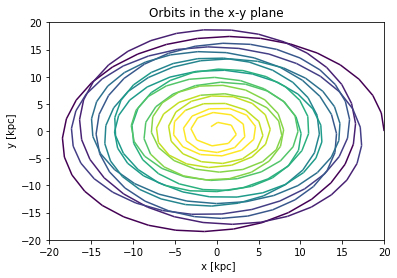

In [24]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as cl
import matplotlib.cm as cm


#### define your colormap

cmap = cm.get_cmap('viridis', 12)

 


##########  create the line collection to color code the plot 

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
normalized_time = t / max(t)
colors = cmap(normalized_time)
lc = LineCollection(segments, colors=colors, cmap=cmap, norm=cl.Normalize(vmin=min(t), vmax=max(t)))





fig, ax = plt.subplots()

ax.add_collection(lc)
ax.set_ylim([-20,20])
ax.set_xlim([-20,20])
ax.set_title("Orbits in the x-y plane")
ax.set_ylabel(" y [kpc]")
ax.set_xlabel(" x [kpc]")

plt.show()


In [ ]:
#calculate your analytical times
t, x, y, vx, vy = otis_functions.analytical_times(BlackHole, interp, Halo_Type=Halo, bmax = None, bmin = None,  interpolating_technique='Radau', t_span = (0,12), Nstep = 1000)


ValueError: One of the requested xi is out of bounds in dimension 0

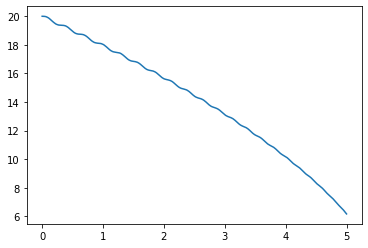

In [ ]:
fig, ax = otis_utils.plt.subplots()
ax.plot(t, otis_utils.np.sqrt(x**2+y**2))